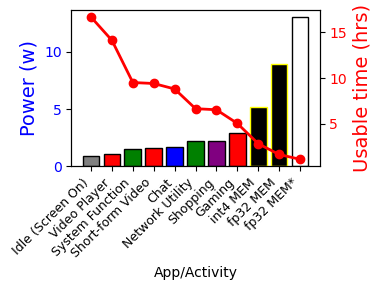

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Define category styles
category_styles = {
    "Communication & Social": {"color": "blue", "marker": "o", "linestyle": "-", "edgecolor": "black"},
    "Entertainment & Media": {"color": "red", "marker": "s", "linestyle": "-", "edgecolor": "black"},
    "Productivity & Utilities": {"color": "green", "marker": "^", "linestyle": "-.", "edgecolor": "black"},
    "Shopping & Finance": {"color": "purple", "marker": "d", "linestyle": "-", "edgecolor": "black"},
    "Health, Travel & Lifestyle": {"color": "orange", "marker": "v", "linestyle": "-", "edgecolor": "black"},
    "Others": {"color": "gray", "marker": "x", "linestyle": "-", "edgecolor": "black"},
    "MEM": {"color": "black", "marker": "o", "linestyle": "-", "edgecolor": "yellow"},
    "notsupport": {"color": "white", "marker": "o", "linestyle": "--", "edgecolor": "black"}
}

# Define app/activity names
apps = [
    'fp32 MEM*', 'int4 MEM', 'fp32 MEM', 'Idle (Screen On)', 'Video Player', 'Chat', 'Network Utility', 'Shopping', 'Gaming', 'Short-form Video', 'System Function']
# apps = ['int4 MEM', 'fp32 MEM', 'Idle (Screen On)', 'Bilibili', 'WeChat', 'Twitch + Clash', 'JD', 'Honor of Kings', 'Douyin', 'Accessibility API']

# Define categories for the apps
app_categories = {
    'int4 MEM': 'MEM',
    'fp32 MEM': 'MEM',
    'fp32 MEM*': 'notsupport',
    'Idle (Screen On)': 'Others',
    'Video Player': 'Entertainment & Media',  # 修改为 Video Player
    'Chat': 'Communication & Social',  # 修改为 Chat
    'Network Utility': 'Productivity & Utilities',  # 修改为 Network Utility
    'Shopping': 'Shopping & Finance',  # 修改为 Shopping
    'Gaming': 'Entertainment & Media',  # 修改为 Gaming
    'Short-form Video': 'Entertainment & Media',  # 修改为 Short-form Video
    'System Function': 'Productivity & Utilities'  # 修改为 System Function
}

# Define power consumption (mAh per minute)
# jetson orin 13 w
power = np.array([58.58, 23.43, 40.09, 4.0, 4.72, 7.56, 10.0, 10.18, 13.18, 7.08, 7.0]) / 23.43 * 5.2
power_consumption = np.array([58.58, 23.43, 40.09, 4.0, 4.72, 7.56, 10.0, 10.18, 13.18, 7.08, 7.0])

# Define battery capacity (assuming 4000mAh)
battery_capacity = 4000

# Calculate usage time (hours)
usage_time = [battery_capacity / consumption / 60 for consumption in power_consumption]

# Sort data by power consumption
sorted_data = sorted(zip(power, usage_time, apps), key=lambda x: x[0])
sorted_power_consumption, sorted_usage_time, sorted_apps = zip(*sorted_data)

# Create the plot
fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot power consumption as a bar chart with category colors
for i, app in enumerate(sorted_apps):
    category = app_categories.get(app, "Others")
    style = category_styles[category]
    
    # Use black edgecolor for all bars
    ax1.bar(app, sorted_power_consumption[i], color=style["color"], edgecolor=style["edgecolor"])

ax1.set_xlabel('App/Activity')
ax1.set_ylabel('Power (w)', color='b', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis for usage time
ax2 = ax1.twinx()

# Plot all apps' usage time with a red line
ax2.plot(sorted_apps, sorted_usage_time, color="red", marker='o', linestyle='-', linewidth=2)

ax2.set_ylabel('Usable time (hrs)', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Set x-ticks with a 45-degree rotation and smaller font size
ax1.set_xticks(np.arange(len(sorted_apps)))
ax1.set_xticklabels(sorted_apps, rotation=45, ha='right', fontsize=9)

# Show plot
plt.tight_layout()
plt.savefig('../figs/motivation-energy-battery.pdf', bbox_inches="tight")
plt.show()